In [3]:
import pandas as pd

import ast

import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Jesse\Downloads\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply( lambda a : ast.literal_eval(a) if pd.notna(a) else a) 

In [4]:
Europe = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan',
    'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
    'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
    'France', 'Georgia', 'Germany', 'Greece', 'Hungary',
    'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo',
    'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
    'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia',
    'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
    'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
    'Vatican City'
]

Europe1 = []

for country in Europe:
    if (df['job_country'] == country).any():
        Europe1.append(country)

job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_Europe = df[(df['job_country'].isin(Europe1)) & (df['job_title_short'].isin(job_titles))].dropna(subset='salary_year_avg')

df_Europe_explode = df_Europe.explode('job_skills')

df_Europe_explode = df_Europe_explode.groupby(['job_country','job_skills']).size().reset_index(name='size')

df_Europe_explode.reset_index()

top_skill_list = []

for country in df_Europe_explode['job_country'].unique():
    country_df = df_Europe_explode[df_Europe_explode['job_country'] == country]
    max_size = country_df['size'].max()
    top_skill_df = country_df[country_df['size'] == max_size]
    unique_top_skill = top_skill_df.drop_duplicates(subset='job_skills', keep='first')
    top_skill_list.append(top_skill_df)
# Concatenate all the DataFrames in the list into one DataFrame
df_topSkills = pd.concat(top_skill_list).reset_index(drop=True)

df_topSkills

,job_country,job_skills,size
0,Albania,sql,4
1,Armenia,python,3
2,Armenia,sql,3
3,Austria,sql,6
4,Belarus,git,1
5,Belarus,kafka,1
6,Belarus,linux,1
7,Belarus,oracle,1
8,Belarus,svn,1
9,Belgium,sql,19


In [5]:
# Countries with the most job postings in Europe with a minimum of 20 postings
df_Europe = df_Europe.groupby(['job_country'])['salary_year_avg'].agg(['median','size']).sort_values(by='size', ascending= False)

df_Europe = df_Europe[df_Europe['size'] > 20]

df_Europe.rename(columns={'size': 'country_size'},inplace= True)

df_Europe

,median,country_size
job_country,,
United Kingdom,97444.00,207
France,96773.00,169
Germany,108412.50,128
Poland,111175.00,118
Portugal,111175.00,89
Spain,96773.00,85
Netherlands,98292.25,60
Greece,96773.00,52
Hungary,98391.50,44


In [6]:
df_Europe1 = df_Europe.reset_index()

Europe_list = df_Europe1['job_country'].to_list()

In [7]:
# Merged the two files together
df_topSkills = df_topSkills[df_topSkills['job_country'].isin(Europe_list)].sort_values(by= 'size', ascending= False)

df_topSkills.rename(columns={'size': 'skills_size'}, inplace= True)

df_Europe.merge(right=df_topSkills, how= 'inner', left_on= 'job_country', right_on= 'job_country')

df_topSkills_merged = df_Europe.merge(right=df_topSkills, how= 'inner', left_on= 'job_country', right_on= 'job_country')

df_topSkills_merged.sort_values(by= 'country_size', ascending= False)

df_topSkills_merged

,job_country,median,country_size,job_skills,skills_size
0,United Kingdom,97444.00,207,sql,122
1,France,96773.00,169,python,93
2,Germany,108412.50,128,python,69
3,Poland,111175.00,118,sql,77
4,Portugal,111175.00,89,sql,46
5,Spain,96773.00,85,sql,45
6,Netherlands,98292.25,60,python,39
7,Greece,96773.00,52,python,36
8,Hungary,98391.50,44,python,23
9,Belgium,97444.00,39,sql,19


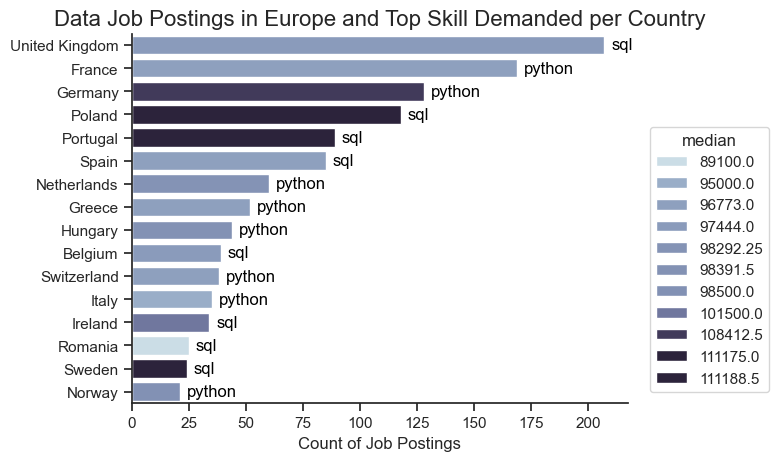

In [51]:
ax = sns.barplot(data= df_topSkills_merged, x= 'country_size', y='job_country', hue='median', legend= 'full', palette= 'ch:s=.25,rot=-.25')
sns.despine()
sns.set_theme(style='ticks')
sns.move_legend(ax, 'lower right', bbox_to_anchor=(1.3,0.01))

from adjustText import adjust_text

plt.title('Data Job Postings in Europe and Top Skill Demanded per Country', fontsize= 16)
plt.ylabel('')
plt.xlabel('Count of Job Postings')

texts = []

for i in range(len(df_topSkills_merged)):
    c_size = df_topSkills_merged['country_size'].iloc[i]
    country = df_topSkills_merged['job_country'].iloc[i]
    j_skill = df_topSkills_merged['job_skills'].iloc[i]
    
    text = plt.text(c_size +3, country , j_skill, va='center', ha='left', color='black')
    texts.append(text)
    
    
plt.show()